# 12. Hierarchical Clustering: Building a Tree of Relationships

**Course Section:** 12

**Topics:** Unsupervised Learning, Clustering, Agglomerative Clustering, Dendrograms, Linkage Criteria.

**Dataset:** Synthetic `make_blobs` data and a small custom dataset for clear dendrogram visualization.

---

## 12.1. Beyond Flat Clusters: The Need for Hierarchy 

So far, algorithms like K-Means and DBSCAN have assigned each data point to a single, final cluster. This is called "flat" clustering.

But what if the relationships in our data are more complex? What if some groups are sub-groups of larger, more general groups? For example, in biology, "dogs" and "wolves" are distinct groups, but they both belong to a higher-level group called "canines."

Hierarchical clustering builds a tree-like structure of these nested relationships. There are two main approaches:
1.  **Agglomerative (Bottom-Up):** The most common method. It starts with each data point in its own cluster and iteratively merges the two closest clusters until only one cluster (containing all points) remains.
2.  **Divisive (Top-Down):** Starts with all data points in one giant cluster and recursively splits it into smaller clusters.

We will focus on the **Agglomerative** approach.

---

## 12.2. The Dendrogram: Visualizing the Hierarchy 

The primary output of hierarchical clustering is a **dendrogram**. It's a tree diagram that shows how clusters are merged.

*   The **y-axis** represents the distance or dissimilarity. The height of the horizontal line connecting two clusters shows the distance at which they were merged.
*   The **x-axis** represents the individual data points.

By "cutting" the dendrogram with a horizontal line at a certain height, we can determine the number of clusters for that level of dissimilarity. Longer vertical lines indicate a larger distance between merges, often suggesting a good place to "cut" the tree.

## 12.3. The Core Question: How to Measure Cluster Distance? (Linkage)

The algorithm needs to decide which two clusters are "closest" at each step. This is defined by the **linkage criterion**:

*   **Single Linkage:** The distance between the two clusters is the distance between their *closest* points. Can lead to long, "chained" clusters.
*   **Complete Linkage:** The distance is measured between the *farthest* points of the two clusters. Tends to produce more compact, spherical clusters.
*   **Average Linkage:** Uses the average distance between every pair of points (one from each cluster). A good compromise between single and complete.
*   **Ward's Linkage:** This is the most popular and often the default. It merges the two clusters that lead to the **minimum increase in total within-cluster variance**. It aims to produce compact, well-separated clusters.

---

## 12.4. Implementation: From Dendrogram to Clusters (Code)

For hierarchical clustering, we often use two libraries: `SciPy` for its excellent dendrogram plotting capabilities, and `Scikit-learn` for the actual clustering model.

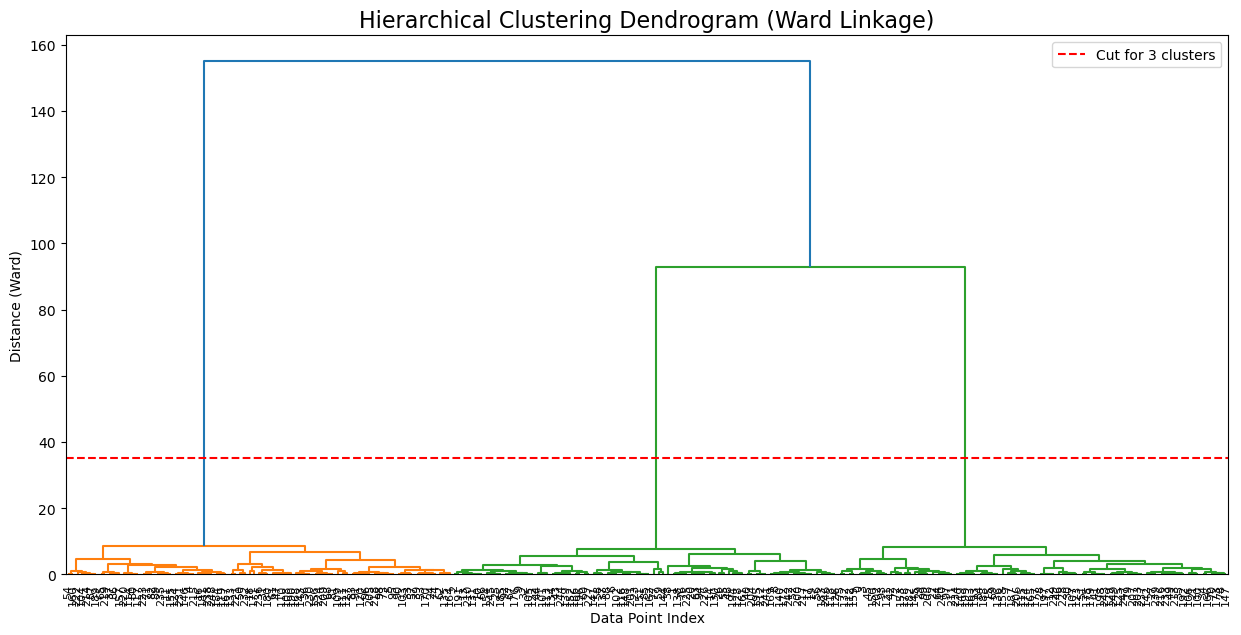

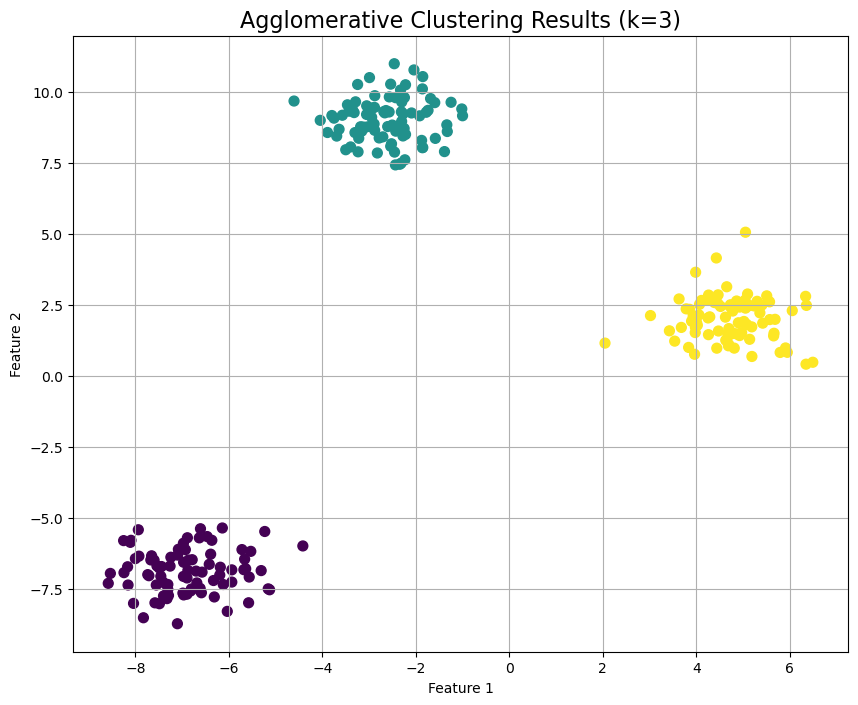

In [7]:
# Step 1: Generate Data and Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate synthetic data with 3 distinct clusters
X, y_true = make_blobs(
n_samples=250, 
centers=3, 
cluster_std=0.80, 
random_state=42
)

# Step 2: Create and Visualize the Dendrogram with SciPy
# Generate the linkage matrix using Ward's method
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 7))
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)', fontsize=16)
plt.xlabel('Data Point Index')
plt.ylabel('Distance (Ward)')
dendrogram(
Z,
leaf_rotation=90.,  # rotates the x axis labels
leaf_font_size=8.,  # font size for the x axis labels
)
# Add a horizontal line to suggest a cut
plt.axhline(y=35, color='r', linestyle='--', label='Cut for 3 clusters')
plt.legend()
plt.show()

# Step 3: Perform Clustering with Scikit-Learn


# Create the model specifying 3 clusters
# The 'linkage' parameter should match what we found best in the dendrogram
agg_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

# Fit and predict the labels
y_agg = agg_cluster.fit_predict(X)

# Visualize the final clusters
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y_agg, s=50, cmap='viridis')
plt.title("Agglomerative Clustering Results (k=3)", fontsize=16)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

## 12.5. Medical Context & Applications

The hierarchical nature of this method is uniquely suited for many medical and biological problems.

1.  **Genomics and Phylogenetics:** This is the quintessential use case. By calculating the genetic distance between different species, viruses, or even tumors, hierarchical clustering can build evolutionary trees (phylogenetic trees) that show how they are related. This was critical for tracking the evolution of COVID-19 variants.
2.  **Disease Taxonomy:** Medical knowledge is inherently hierarchical. Hierarchical clustering can be applied to patient data (symptoms, lab tests) to automatically discover a taxonomy of diseases. It might find a major split between "inflammatory" and "non-inflammatory" conditions, with each branch further splitting into more specific diagnoses.
3.  **Anatomical Structure Analysis:** In brain imaging, clustering different regions of the brain based on their connectivity patterns can produce a hierarchy of functional units, from individual specialized areas to large-scale brain networks.

---

## 12.6. Summary
*   **Hierarchical Clustering** builds a nested tree of clusters, visualized by a **dendrogram**.
*   **Agglomerative (bottom-up)** is the most common approach.
*   The **linkage criterion** (e.g., Ward, complete, single) defines how the distance between clusters is measured and significantly impacts the result.
*   **Pros:**
*   The dendrogram provides rich, interpretable visualization of the data's structure.
*   Does not require pre-specifying the number of clusters.
*   **Cons:**
*   Computationally intensive ($O(N^2)$ or more), making it unsuitable for very large datasets.
*   Merges are irreversible, which can lead to suboptimal clusters if an early merge is not ideal.
